In [1]:
#Version 2, questions answered edited by Claire on March 14, 2018

Compute Fourier coefficients using FFT

Loading modules for fast Fourier transform (FFT) and inverse fast Fourier transform (IFFT) from SciPy package

In [22]:
from scipy.fftpack import fft, ifft # Load fast Fourier transform packages from scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

An example of FFT and IFFT operation

In [23]:
#create a set of N evenly spaced discrete data points
N = 100 # spacing of data / resolution
x = 2*pi*np.arange(N)/N
y = np.cos(x)

Plot the data to see how it looks

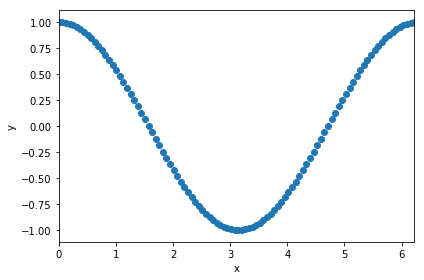

In [24]:
plt.scatter(x,y)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()


We know that $$y = \cos(\lambda)$$ can be written as $$y = \frac{1}{2} e^{-i\lambda} + \frac{1}{2} e^{i\lambda}.$$ The coefficients $$c_{-1} = c_{1} = \frac{1}{2}$$ while other coefficients are zeros.

Let's trying doing a discrete FFT on $y$. Note that the output of fft(y) is in fact $N c_k$ given $c_k$ defined above. A factor of $\frac{1}{N}$ is multipled here to recover $c_k$.


In [25]:
ck = 1/N * fft(y)
print(ck.size)

100


What do the 100 elements in ck represent? Referring to the SciPy documentation (y in the documentation below is N*ck in this notebook):

For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In the example I show here, $\cos \left(\frac{2\pi n}{N} \right)$ is an even function. We would expect the positive and negative frequency terms corresponding to the same frequency have the same magnitude. Let's check if that's the case.

In [26]:
T = 1./x.size
xf = np.hstack(( np.arange(0,N//2), np.arange(-N//2,0) ))

Confirm that xf and cf are of the same size

In [27]:
print('xf.size=',xf.size)
print('ck.size=',ck.size)

xf.size= 100
ck.size= 100


In [28]:
#print coefficient c_k and see what it looks like
print(ck[:10])

[ -2.33146835e-17 +0.00000000e+00j   5.00000000e-01 -6.80047730e-17j
   5.75160293e-18 -2.45929817e-17j   2.56533007e-17 -5.69044597e-18j
   1.17745885e-18 +2.78004314e-17j  -1.18692392e-17 -2.10361300e-17j
   2.95612411e-19 +1.16984114e-17j   1.08261127e-17 +2.82636527e-17j
  -1.03792696e-17 +7.06374423e-19j   5.55492036e-18 -1.20217872e-17j]


Since cos is an even function, the imaginary part of $c_k$ are zero. Only the real part of $c_1$ is non-vanishing (as expected). Let's plot $\|c_k\|$ in a bar graph, where $n \in [-10,10]$:

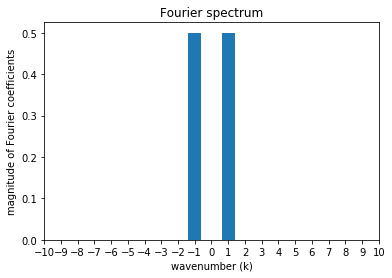

In [29]:
plt.bar(xf, np.abs(ck)) # Take the absolute value. 
# In this case, cosine is an even function, so this is equivalent to the real value.
plt.xticks(xf)
plt.xlim((-10,10))
plt.title('Fourier spectrum')
plt.xlabel('wavenumber (k)');
plt.ylabel('magnitude of Fourier coefficients');
plt.show()

Inverse Fourier transform

To recover the series from the Fourier coefficients, you can use the inverse Fourier transform function (ifft) as demonstrated below. Note that if y = fft(x), then x = ifft(y).

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


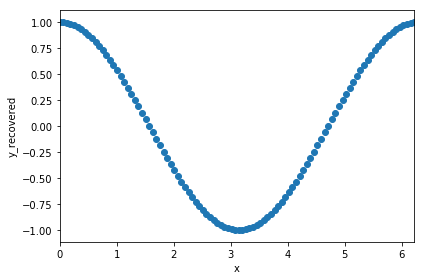

In [30]:
y_recovered = ifft(N * ck)

plt.scatter(x,y_recovered)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y_recovered')
plt.tight_layout()
plt.show()

# Exercise
For each of the following functions,

describe how you would expect the Fourier spectrum ($c_k$) to look like;
use the results from FFT to confirm your answer; and lastly,
recover the original time series using the Fourier coefficients obtained from FFT, and plot it out.
Bonus question: Can you initialize a array ck_4 such that IFFT would recover $\sin\lambda$?
Hint: In python, j denotes the imaginary unit. If I want to construct $\cos\lambda$ from Fourier coefficients ck_x, I would initialize ck_x by:

ck_x = np.zeros((N),'complex')
ck_x[1] = 0.5+0.j
ck_x[-1] = 0.5+0.j
y_recovered = ifft(N * ck)

Question 1
$f(\lambda) = 1 + 2\cos \lambda - 3\sin \lambda$.
How would the spectrum look like? Which coefficients $\|c_k\|$ are non-trivial? What are their expected values?
(Double click to type in your answer, and then press Shift+return)

The spectrum will have peaks of at k = -1, k = 0, k = 1. We also know that as sine and cosine are both present, there will be an imaginary portion. 

100
x1f.size= 100
c1k.size= 100


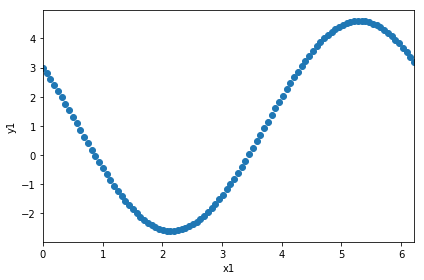

In [31]:
# Type your code here for Question 1
N1 = 100 # spacing of data / resolution
x1 = 2*pi*np.arange(N)/N
y1 = 1+2*np.cos(x1)-3*np.sin(x1) # replace None with your code

#make plot
plt.scatter(x1,y1)
plt.xlim((x1.min(),x1.max()))
plt.xlabel('x1')
plt.ylabel('y1')
plt.tight_layout()
plt.show

#check size
c1k = 1/N*fft(y1)
print(c1k.size)

t1 = 1./x1.size
x1f = np.hstack(( np.arange(0,N// 2), np.arange(-N//2,0)  ))

#check they are the same size
print( 'x1f.size=', x1f.size)
print( 'c1k.size=', c1k.size)



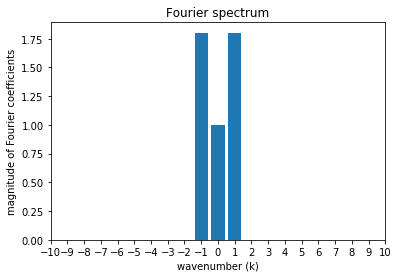

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

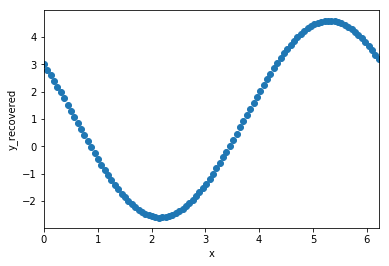

In [32]:
#plot fourier spectrum
plt.bar(x1f, np.abs(c1k)) #take absolute value because want the magnitude)
plt.xticks(xf)
plt.xlim((-10,10))
plt.title('Fourier spectrum')
plt.xlabel('wavenumber (k)');
plt.ylabel('magnitude of Fourier coefficients');
plt.show()

#get it back
y1_recovered = ifft(N*c1k)

plt.scatter(x1,y1_recovered)
plt.xlim((x1.min(),x1.max()))
plt.xlabel('x')
plt.ylabel('y_recovered')
plt.tight_layout
plt.show


In [33]:
#see values of ck
print(c1k[:10])

[  1.00000000e+00 +0.00000000e+00j   1.00000000e+00 +1.50000000e+00j
  -6.53072876e-18 +2.40752800e-17j   6.72909468e-17 +7.01387342e-17j
  -3.05872819e-17 +1.15905380e-16j  -6.07208923e-17 +4.07621352e-18j
   3.87809976e-17 -3.86247070e-17j  -1.37428325e-17 +7.75939917e-17j
  -3.64488640e-17 -6.23193109e-17j  -7.52881217e-18 +3.66595751e-17j]


Question 2
$f(\lambda) = \cos 2\lambda - 5\sin 3\lambda$.
How would the spectrum look like? Which coefficients $\|c_k\|$ are non-trivial? What are their expected values?
(Double click to type in your answer, and then press Shift+return) 
The Fourier spectrum will have peaks where k = -3, -2, 2, and 3. 

<function matplotlib.pyplot.show>

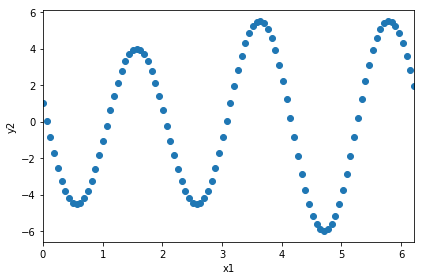

In [34]:
#Code for Question 2
N1 = 100 # spacing of data / resolution
x1 = 2*pi*np.arange(N)/N
y2 = np.cos(2*x1)-5*np.sin(3*x1) # replace None with your code

#make plot
plt.scatter(x1,y2)
plt.xlim((x1.min(),x1.max()))
plt.xlabel('x1')
plt.ylabel('y2')
plt.tight_layout()
plt.show

100
x2f.size= 100
c2k.size= 100


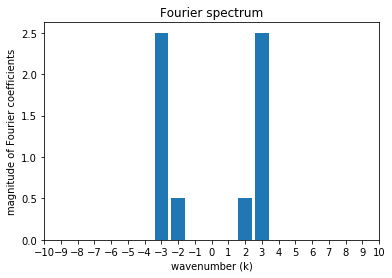

[ -6.93889390e-16 +0.00000000e+00j   1.68557152e-16 -5.10186384e-16j
   5.00000000e-01 -4.68514116e-16j   7.10287473e-16 +2.50000000e+00j
   1.22465162e-16 +8.86322614e-17j   3.94314177e-16 +6.30197640e-16j
  -2.72600170e-16 +3.97268408e-16j  -7.14975669e-17 +3.27528225e-16j
   6.04479331e-18 -1.74608063e-16j  -4.57726586e-16 +4.30233777e-16j]


In [35]:
#check size and declare c2k
c2k = 1/N*fft(y2)
print(c2k.size)

t1 = 1./x1.size
x2f = np.hstack(( np.arange(0,N// 2), np.arange(-N//2,0)  ))

#check they are the same size
print( 'x2f.size=', x2f.size)
print( 'c2k.size=', c1k.size)

#plot fourier spectrum
plt.bar(x2f, np.abs(c2k)) #take absolute value because want the magnitude)
plt.xticks(xf)
plt.xlim((-10,10))
plt.title('Fourier spectrum')
plt.xlabel('wavenumber (k)');
plt.ylabel('magnitude of Fourier coefficients');
plt.show()

#see values of c2k
print(c2k[:10])

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

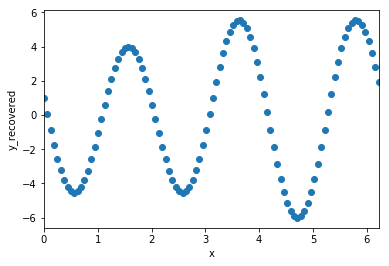

In [36]:
#get it back
y2_recovered = ifft(N*c2k)

plt.scatter(x1,y2_recovered)
plt.xlim((x1.min(),x1.max()))
plt.xlabel('x')
plt.ylabel('y_recovered')
plt.tight_layout
plt.show

Question 3
$f(\lambda) = \lambda$.
What would the spectrum look like? For Question 3, it is good enough to give qualitative description.

As $f(\lambda)$ will be a straight line, we will see a peak at k = 0, where as the absolute value of the wavenumber increases, the magnitude will decrease, such that the wave functions can mimic a straight line 

Bonus question: Can you initialize a array ck_4 such that IFFT would recover $\sin\lambda$?
Hint: In python, j denotes the imaginary unit. If I want to construct $\cos\lambda$ from Fourier coefficients ck_x, I would initialize ck_x by:


ck_x = np.zeros((N),'complex')

ck_x[1] = 0.5+0.j

ck_x[-1] = 0.5+0.j

y_recovered = ifft(N * ck)

In [37]:
#initialize ck_4 to recover sin(lambda), 
#as e^x = isin(x) + cos(x), should be same as cosign just with imaginary portion
ck_4 = np.zeros((N),'complex')
ck_4[1] = 0 +0.5j
ck_4[-1] = 0 +0.5j